In [26]:
#ARIMA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm 
import statsmodels.api as smt
import warnings
warnings.simplefilter('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,3
from statsmodels.tsa.arima_model import ARIMA

In [27]:

Group26_asx200_m = pd.read_csv('ASX200Monthly.csv', parse_dates = ['Date'], index_col='Date')

Group26_asx200_closing_m = Group26_asx200_m['Close']

In [28]:

Group26_asx200_closing_m = pd.to_numeric(Group26_asx200_closing_m, errors='coerce')

Group26_asx200_closing_m=Group26_asx200_closing_m.dropna()

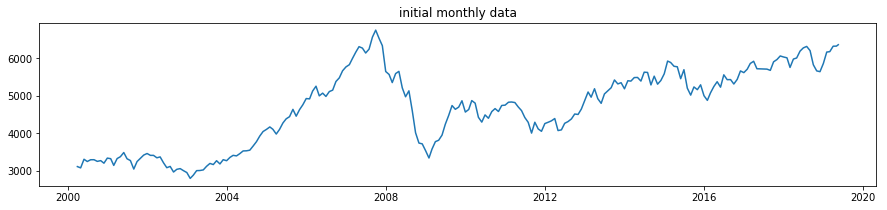

In [29]:
#check the original data
plt.figure()
plt.plot(Group26_asx200_closing_m)
plt.title('initial monthly data')
plt.show()

In [30]:
#Train test split
Group26_trainsize=round(len(Group26_asx200_closing_m)*0.8)
Group26_Xtrain=Group26_asx200_closing_m[:Group26_trainsize]
Group26_Xtest=Group26_asx200_closing_m[Group26_trainsize:]

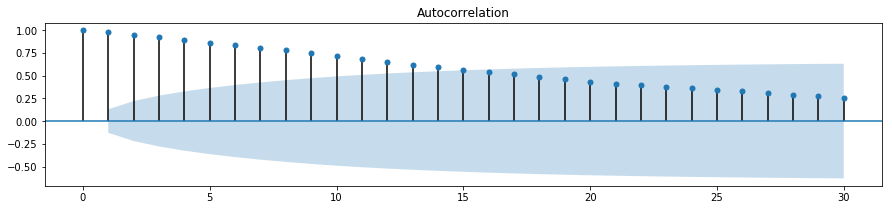

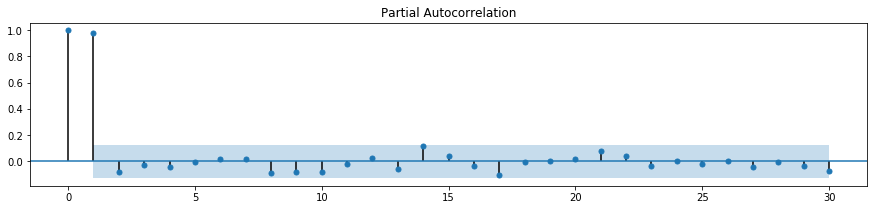

In [31]:
#ACF AND PACF for monthly data
smt.graphics.tsa.plot_acf(Group26_asx200_closing_m, lags=30, alpha = 0.05)
smt.graphics.tsa.plot_pacf(Group26_asx200_closing_m, lags=30, alpha=0.05)
plt.show()

In [32]:
#check the log data
Group26_m_log=np.log(Group26_asx200_closing_m)

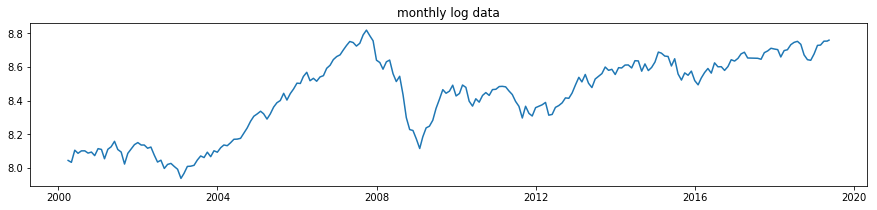

In [33]:
#plot the log data
plt.figure()
plt.plot(Group26_m_log)
plt.title('monthly log data')
plt.show()

In [34]:
#compare variance of the original data and logged data 
Group26_m_var_ori=np.var(Group26_asx200_closing_m)
Group26_m_var_log=np.var(Group26_m_log)
print(Group26_m_var_ori)
print(Group26_m_var_log)

1049001.2589073656
0.05303156158030188


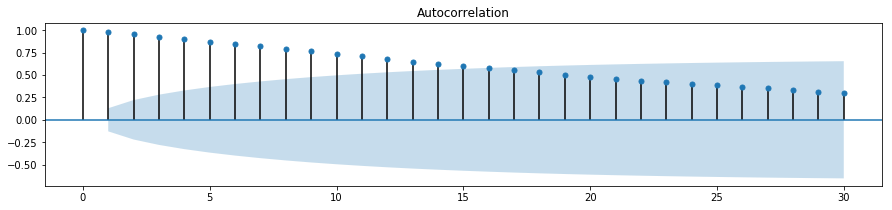

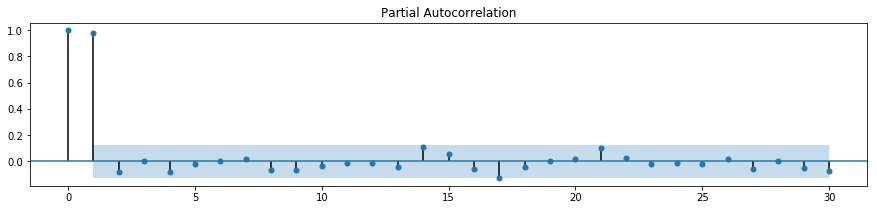

In [35]:
#monthly 
smt.graphics.tsa.plot_acf(Group26_m_log, lags=30, alpha = 0.05)
smt.graphics.tsa.plot_pacf(Group26_m_log, lags=30, alpha=0.05)
plt.show()

In [36]:
# check the difference of log data
#take difference
Group26_log_m_diff=Group26_m_log.diff()[1:]

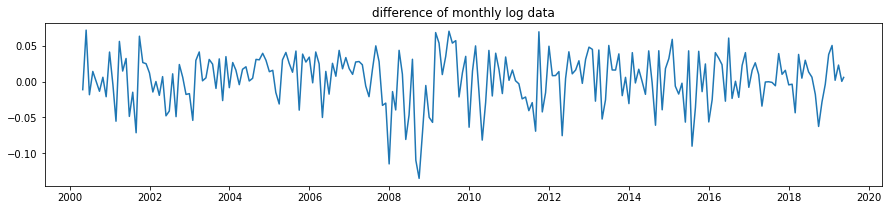

In [37]:
#plot the diff data
plt.figure()
plt.plot(Group26_log_m_diff)
plt.title('difference of monthly log data')
plt.show()


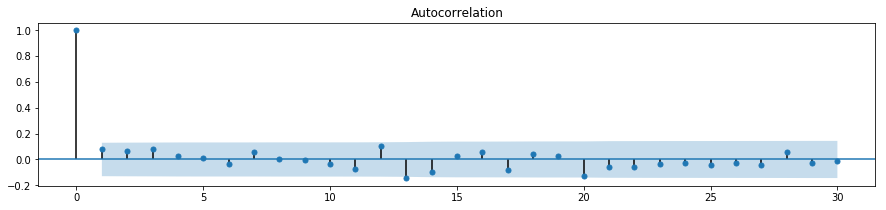

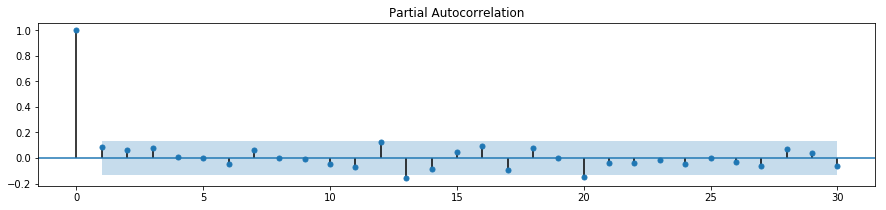

In [38]:
#mplot acf and pacf for monthly diff log data
smt.graphics.tsa.plot_acf(Group26_log_m_diff, lags=30, alpha =
0.05)
smt.graphics.tsa.plot_pacf(Group26_log_m_diff, lags=30, alpha =
0.05)
plt.show()

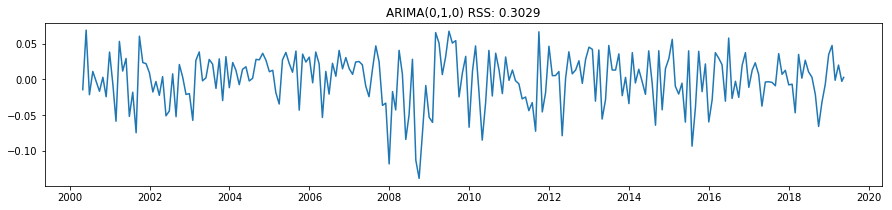

In [39]:
#model fitting 考虑为什么要用order=0，1，0。
import warnings
warnings.simplefilter('ignore')
from statsmodels.tsa.arima_model import ARIMA 
Group26_model = ARIMA(Group26_m_log, order=(0, 1, 0))   
Group26_results_ARIMA = Group26_model.fit(disp=-1)  
Group26_residuals_ARIMA = pd.DataFrame(Group26_results_ARIMA.resid) 

plt.figure()  
plt.plot(Group26_residuals_ARIMA) 
plt.title('ARIMA(0,1,0) RSS: %.4f'% sum((Group26_results_ARIMA.resid.values)**2))
plt.show()  


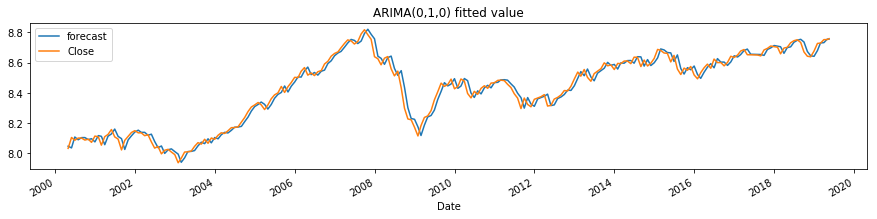

In [40]:
# Get Fitted Series 
Group26_fitted = Group26_results_ARIMA.predict(typ = 'levels', dynamic = False) 
# Actual vs Fitted  
Group26_results_ARIMA.plot_predict(dynamic=False)  
plt.title('ARIMA(0,1,0) fitted value')
plt.show()  

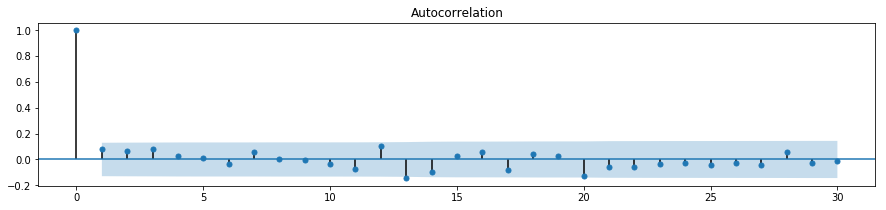

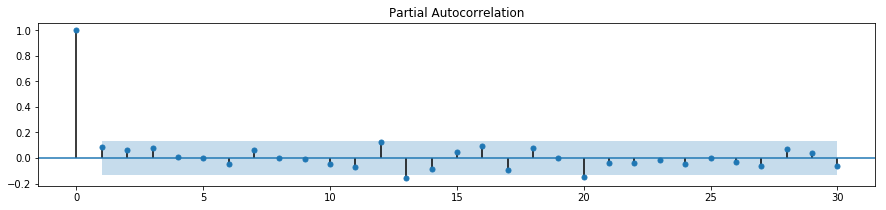

In [41]:
#res diag
smt.graphics.tsa.plot_acf(Group26_residuals_ARIMA, lags=30, alpha =
0.05)
smt.graphics.tsa.plot_pacf(Group26_residuals_ARIMA, lags=30, alpha =
0.05)
plt.show()

In [42]:
#Monthly
#)Use AIC,BIC to re-choose the orders,than residual diagnostics
#get the "optimal ARIMA model"
import statsmodels.tsa.stattools as st 
order = st.arma_order_select_ic(Group26_log_m_diff,max_ar=4,max_ma=4,ic=['aic']) 
print(order.aic_min_order) 

(0, 0)


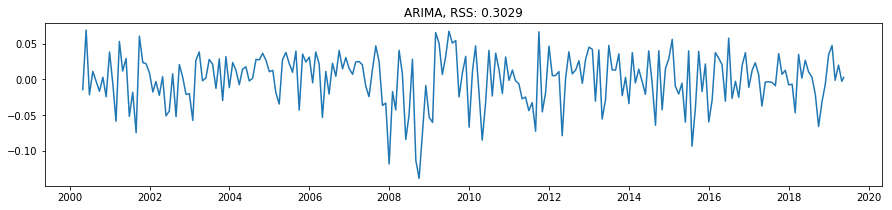

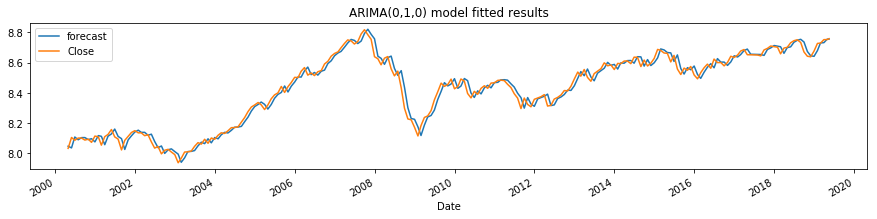

In [43]:
p,q = order.aic_min_order[0], order.aic_min_order[1] 
model_AIC = ARIMA(Group26_m_log, order=(p, 1, q))   
results_AIC_ARIMA = model_AIC.fit(disp=-1)   
residuals_AIC = pd.DataFrame(results_AIC_ARIMA.resid)  
plt.figure()  
plt.plot(residuals_AIC) 
plt.title('ARIMA, RSS: %.4f'% sum((results_AIC_ARIMA.resid.values)**2)) 
# Get Fitted Series 
fitted_AIC = results_AIC_ARIMA.predict(typ = 'levels', dynamic = False) 
# Actual vs Fitted  
results_AIC_ARIMA.plot_predict(dynamic=False)  
plt.title("ARIMA(0,1,0) model fitted results") 
plt.show() 

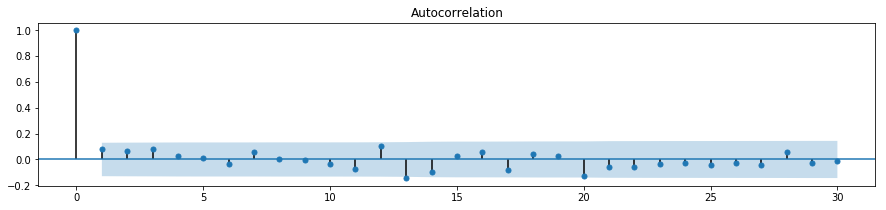

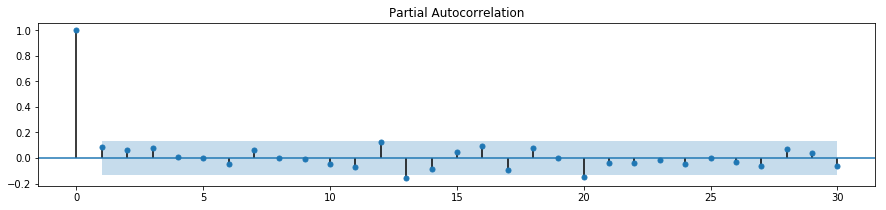

In [44]:
#res diag
smt.graphics.tsa.plot_acf(residuals_AIC, lags=30, alpha =
0.05)
smt.graphics.tsa.plot_pacf(residuals_AIC, lags=30, alpha =
0.05)
plt.show()

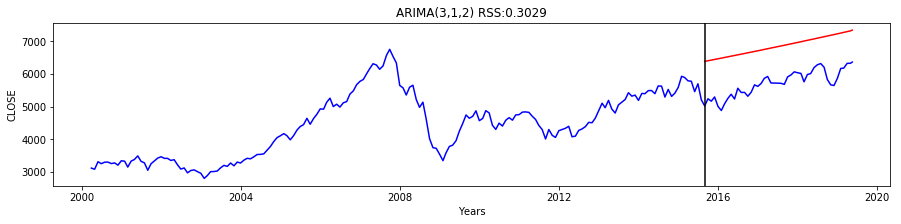

In [45]:
#Monthly
#forecast and MSE MAD MAPE
forecast_m,stderr_m,conf_int_m= results_AIC_ARIMA.forecast(len(Group26_Xtest))
#print (forecast_d)
plt.figure()
plt.plot(Group26_Xtest.index,np.exp(forecast_m),'r')
plt.plot(Group26_asx200_closing_m,'b')
plt.title('ARIMA(3,1,2) RSS:%.4f'% sum((results_AIC_ARIMA.resid.values)**2))
plt.xlabel("Years")
plt.ylabel("CLOSE")
plt.axvline(x=Group26_asx200_closing_m.index[Group26_trainsize],color='black')
plt.show()


Group24_asx200_m = np.exp(testing_m)
Group24_asx200_m_forcast = np.exp(forecast_m)
from sklearn.metrics import mean_squared_error
mse_d = mean_squared_error(Group24_asx200_m, Group24_asx200_m_forcast)

import math
math.sqrt(mse_m)

forecast=Group26_results_ARIMA.forecast(len(Group26_Xtest))
from sklearn.metrics import mean_squared_error
X_train=np.exp(Group26_d_log)
mse_d=mean_squared_error(X_train,forecast)

In [46]:
Group26_results_ARIMA.summary()
#Yt=0.002-0.2920*Yt-1  -0.8684*Yt-2  - 0.2757*Yt-3 +et+0.2564* et-1+0.8688*et-2+ 0.2171* et-3

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  230
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 436.385
Method:                           css   S.D. of innovations              0.036
Date:                Tue, 21 May 2019   AIC                           -868.770
Time:                        23:48:20   BIC                           -861.894
Sample:                             1   HQIC                          -865.996
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0031      0.002      1.298      0.196      -0.002       0.008
==============================================================================
"""

In [47]:
#5 days forecast
#1） 使用ARIMA（3，0，3），输入数据是差分数据 Group26_log_d_diff;
# 2) 从模型的summary()中得到系数,写出ARMA方程
# 3） 根据方程写出预测未来五步,这个结果是log的差分。
# 4） 根据log的差分，复原到原来的序列，得到原序列的未来5天的预测值

In [48]:
# 残差序列/扰动/新信息
ret=Group26_results_ARIMA.resid
rt = ret.tolist()
# 未来扰动信息的期望值为0，所以对未来的扰动设置为0
for i in range(5):
    rt.append(0)
print(len(rt),rt[-1],rt[-2],rt[-3],rt[-4],rt[-5])


235 0 0 0 0 0


In [50]:
#模型的输入序列： 原始序列的差分序列
yGroup=Group26_log_m_diff.tolist()
#一步一步的递推向前预测得到 log-diff的5-ahead预测值
for i in range(len(yGroup),len(yGroup)+5):
    Y_hat =0.002-0.02920*yGroup[i-1]-0.08684*yGroup[i-2]-0.02757*yGroup[i-3]+rt[i]+0.2564*rt[i-1]+0.8688*rt[i-2]+0.2171*rt[i-3]
    yGroup.append(Y_hat)

In [ ]:
#恢复到原序列：
N=len(Group26_log_m_diff)
#log diff 序列
yGrouplog=Group26_m_log[1:].tolist()

for i in range(N,N+5):
    yhatlog=yGrouplog[i-1]+yGroup[i]
    print(np.exp(yhatlog))
    yGrouplog.append(yhatlog)
    #yt=deltay+yt-1


In [ ]:
#Monthly
#forecast and MSE MAD MAPE
# Forecast and MSE
forecast_d,stderr_d,conf_int_d= results_AIC_ARIMA.forecast(len(Group26_Xtest))
print(forecast_d)
plt.figure()
plt.plot(Group26_Xtest.index,np.exp(forecast_d),'r')
plt.plot(Group26_asx200_closing_d,'b')
plt.title('ARIMA(3,1,2) RSS:%.4f'% sum((results_AIC_ARIMA.resid.values)**2))
plt.xlabel("Years")
plt.ylabel("CLOSE")
plt.axvline(x=Group26_asx200_closing_d.index[Group26_trainsize],color='black')
plt.show()

Group24_asx200_m = np.exp(testing_m)
Group24_asx200_m_forcast = np.exp(forecast_m)
from sklearn.metrics import mean_squared_error
mse_d = mean_squared_error(Group24_asx200_m, Group24_asx200_m_forcast)

import math
math.sqrt(mse_m)


forecast=Group26_results_ARIMA.forecast(len(Group26_Xtest))
from sklearn.metrics import mean_squared_error
X_train=np.exp(Group26_d_log)
mse_d=mean_squared_error(X_train,forecast)

AttributeError: type object 'ARIMA' has no attribute 'forecast'